 # **> POSTTEST 2**
 ## Instruksi:
 1. Tampilkan rata-rata, standar deviasi, nilai minimum, nilai maksimum, Q1, Q2, dan Q3 dari attribute bertipe angka.
2. Tampilkan 10 record pertama dari dataset dengan attribute bertipe angka.
3. Tampilkan informasi jumlah record, jumlah attribute, nama attribute, jumlah attribute dengan tipe angka.
4. Tampilkan jumlah label dari semua attribute yang bernilai object (contoh : Jenis Kelamin, Agama).
5. Visualisasikan dataset dengan salah satu grafik. Pilih grafik yang paling cocok untuk memvisualisasikan data tersebut.
6. Tampilkan korelasi dataset menggunakan heatmap.
7. Tulis kesimpulan dari hasil analisis dan visualisasi data. Tulis pada cell  Markdown.
8. Semakin rinci visualisasi semakin baik nilainya.
 ---

##Import library
Pada cell berikut, library pandas, matplotlib, dan seaborn di immpor agar bisa digunakan di dalam kode. Penggunaan alias pada tiap library diperuntukkan agar fungsi dari library lebih mudah dipanggil dan efisien.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Membuat variabel df untuk menyimpan nilai berupa dataframe dari dataset yang  dibaca oleh pandas. Kemudian menampilkan semua data yang memiliki nilai numerik untuk dihitung berapa jumlah datanya, rata rata, standar deviasi, minimum, maksimum, Q1, Q2, dan Q4.

In [42]:
df = pd.read_csv('/content/drive/MyDrive/KB_Posttest/Dataset/blood_donor_dataset.csv')
df.describe()


,months_since_first_donation,number_of_donation,pints_donated
count,10000.000000,10000.000000,10000.000000
mean,59.953100,25.128200,37.614000
std,34.911379,14.654195,26.334072
min,0.000000,0.000000,0.000000
25%,30.000000,12.000000,16.000000
50%,60.000000,26.000000,34.000000
75%,90.000000,38.000000,50.000000
max,120.000000,50.000000,100.000000


In [ ]:
angkaOnly = df.select_dtypes(include=['int64', 'float64'])
print(angkaOnly.head(10))

   months_since_first_donation  number_of_donation  pints_donated
0                           65                  31             62
1                           64                   8             16
2                           39                   6              6
3                           55                  20             20
4                            7                  35             35
5                          105                  21             21
6                           30                   9             18
7                           13                  19             38
8                           56                   5             10
9                           24                  11             11


In [ ]:
jumlahRecord = df.shape[1]
jumlahAtribut= df.shape[0]
DaftarAtribut = df.columns.tolist()

print("Jumlah Record:", jumlahRecord)
print("Jumlah Atribut:", jumlahAtribut)
print("Daftar Atribut:", DaftarAtribut)

Jumlah Record: 12
Jumlah Atribut: 10000
Daftar Atribut: ['donor_id', 'name', 'email', 'password', 'contact_number', 'city', 'blood_group', 'availability', 'months_since_first_donation', 'number_of_donation', 'pints_donated', 'created_at']


In [ ]:
AttrObject = df.select_dtypes(include=['object'])
labelUnik = AttrObject.nunique()
print("Total Label: ", labelUnik)
print("==="*20)
print(AttrObject.head(10))

Total Label:  donor_id          10000
name               9419
email              9954
password          10000
contact_number     9998
city                  8
blood_group           8
availability          2
created_at         3409
dtype: int64
     donor_id               name                          email    password  \
0  1b8b4c828a       Norma Fisher            ysullivan@yahoo.com  P5hX6Syg*A   
1  a6a3f7fe55      Eugene Bowman       hramos@brown-sellers.com  b6Wq6Cqz@5   
2  cee6478144   Sheri Bolton DDS          jasmine85@hotmail.com  $9RB51m#s7   
3  5986bc55f9         Kelly Boyd  pattylawrence@riley-hayes.com  @5Tdg(4kCm   
4  93246afe6c      Taylor Guzman       martinezjacob@wilson.com  x!)9Ag@J*7   
5  486ffe4e4a  Jonathan Williams         wgonzalez@harrison.com  R(2bFckq!a   
6  32e4e74c30      Bob Stevenson           johnbenton@yahoo.com  Vs)4AhVlVd   
7  62927f7975      Amanda Savage        martincaleb@hotmail.com  p7Q#Cn$m#I   
8  17a47b3f43     Jennifer Smith            ba

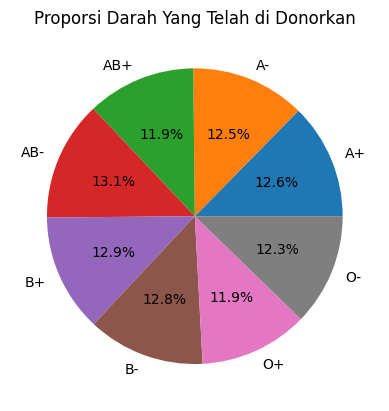

In [ ]:
proporsiDonor = df.groupby('blood_group')['pints_donated'].sum()
plt.pie(proporsiDonor, labels=proporsiDonor.index, autopct='%1.1f%%')
plt.title('Proporsi Darah Yang Telah di Donorkan')
plt.show()

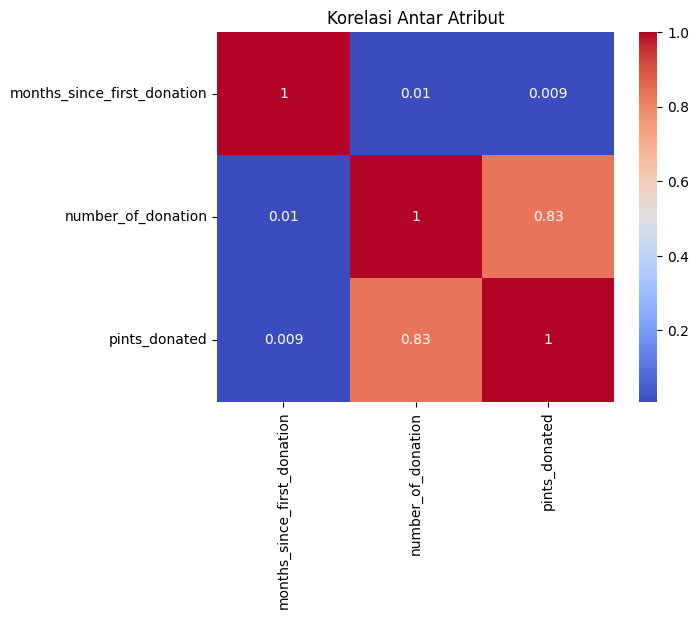

In [ ]:
korelasiDataDonor = df.corr(numeric_only=True)
sns.heatmap(korelasiDataDonor, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Atribut')
plt.show()

Dari hasil analisis di atas diperoleh informasi bahwa dataset memiliki 2 tipe data, ada object dan integer. Ketika, mengecek nilai minimum, maksimum, rata-rata, standar deviasi, Q1, Q2, dan Q3. Hanya atribut yang berisi record dengan tipe data integer yang akan menampilkan nilai nilai tersebut.

Kemudian, diperolaeh informasi dari grafik pie atau pie chart bahwa persentase darah yang didistribusikan atau didonorkan itu lebih banyak dari golongan AB-, kemudian disusul oleh, B+, B-, A+, A-, O-, O+, dan terakhir AB+.

Terakhir dari visualisasi heatmap menunjukkan bahwa variabel number of donation memiliki pengaruh besar terhadap pints donated sebanyak 0.83 dibandingkan pengaruh months since first donation dengan number of donation atau pints donated dengan nilai 0.01 dan 0.009.

Maka, kesimpulan dari grafik heatmap ialah frekuensi donor lebih berpengaruh dalam menentukan total darah yang terkumpul dibandingkan bulan awal mmula melakukan donor darah.

 # **> POSTTEST 3**
 ## Instruksi:
 1. Data Cleaning
 - Handling missing value (jika ada)
 - Handling duplicate value (jika ada)
 - Handling outlier (jika ada)
 2. Normalisasi/standarisasi kolom numerik
 3. Encoding kolom kategorikal
 4. Feature engineering (minimal 1 feature baru)
 5. Splitting data ke dalam data training & data testing
 ---

## Cek missing value

tidak ada nilai yang kosong pada tiap record dan fitur tertentu.

In [37]:
df.isnull().sum()

,0
donor_id,0
name,0
email,0
password,0
contact_number,0
city,0
blood_group,0
availability,0
months_since_first_donation,0
number_of_donation,0


## Cek duplikasi data

tidak ada ditemukan adanya duplikasi pada data, sehingga bisa diasumsikan bahwa data bersih

In [38]:
duplicate = df.duplicated().sum()
print(duplicate)

0


## Cek outlier data

tidak ada outlier dari tiap kolom atau fitur dengan tipe data numerik, warna orange pada box plot mewakili fitur months_since_first_donation, kemudian warna hijau mewakili fitur number_of_donation, terakhir warna biru mewakili fitur pints_donated.

<Axes: ylabel='months_since_first_donation'>

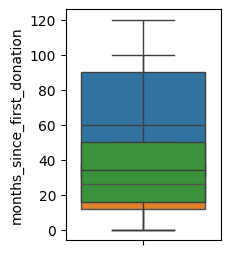

In [39]:
fig, ax = plt.subplots(figsize=(2,3))
sns.boxplot(df['months_since_first_donation'])
sns.boxplot(df['number_of_donation'])
sns.boxplot(df['pints_donated'])

## Membuang atau mengurangi fitur yang tidak perlu

Dengan membuang beberapa fitur yang tidak relevan akan mempermudah proses training dan splitting data, karena lebih gampang untuk diubah menjadi numerikal menggunakan encoding

In [43]:
df = df.drop(['donor_id', 'name', 'email', 'password', 'contact_number', 'created_at'], axis=1)
display(df.head())

,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated
0,Hobart,A+,No,65,31,62
1,Darwin,AB-,Yes,64,8,16
2,Melbourne,AB+,Yes,39,6,6
3,Darwin,A-,No,55,20,20
4,Darwin,O-,No,7,35,35


## Mengecek info dari sisa fitur
Ditemukan bahwa fitur fitur yang sudah didrop sudah tidak ada lagi sehingga yang tersisisa hanyalah fitur dengan tipe data integer dan beberapa yang dapat diubah menjadi numerik dengan encoding

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   city                         10000 non-null  int64
 1   blood_group                  10000 non-null  int64
 2   availability                 10000 non-null  int64
 3   months_since_first_donation  10000 non-null  int64
 4   number_of_donation           10000 non-null  int64
 5   pints_donated                10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


## Encoding fitur blood_group
Dengan memanggil library sklearn untuk mengimpor labelencoder, maka fitur blood_group bisa berubah menjadi numerik dimana;
 A+ = 0
 A- = 1
 AB+ = 2
 AB- = 3
 B+ = 4
 B- = 5
 O+ = 6
 O- = 7

In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['blood_group'] = le.fit_transform(df['blood_group'])
df.head()

,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated
0,Hobart,0,No,65,31,62
1,Darwin,3,Yes,64,8,16
2,Melbourne,2,Yes,39,6,6
3,Darwin,1,No,55,20,20
4,Darwin,7,No,7,35,35


## Encoding fitur city
Mengubah nama nama kota menjadi bentuk kategorikal agar lebih mudah saat masuk ke dalam datasplit

In [45]:
city = LabelEncoder()
df['city'] = city.fit_transform(df['city'])
df.head()

,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated
0,4,0,No,65,31,62
1,3,3,Yes,64,8,16
2,5,2,Yes,39,6,6
3,3,1,No,55,20,20
4,3,7,No,7,35,35


## Encoding fitur availability
Mengubah atau menimpa nilai string yang awalnya Yes dan No dengan nilai numerik yaitu 1 dan 0.

In [46]:
df['availability'] = df['availability'].replace({'Yes': 1, 'No': 0})
df.head()

/tmp/ipython-input-246927935.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['availability'] = df['availability'].replace({'Yes': 1, 'No': 0})


,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated
0,4,0,0,65,31,62
1,3,3,1,64,8,16
2,5,2,1,39,6,6
3,3,1,0,55,20,20
4,3,7,0,7,35,35


## Feature Engineering
Menambahkan satu fitur baru untuk menghitung frekuensi donor darah tiap bulan

In [53]:
df['donation_cadence'] = df['number_of_donation'] / (df['months_since_first_donation'] + 1)
df.head()

,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated,donation_cadence
0,4,0,0,65,31,62,0.469697
1,3,3,1,64,8,16,0.123077
2,5,2,1,39,6,6,0.150000
3,3,1,0,55,20,20,0.357143
4,3,7,0,7,35,35,4.375000


## Normalisasi data

Mengubah semua nilai numerik dengan kisaran 0 - 1 menggunakan fungsi normalisasi MinMaxScaler. Bertujuan agar data tidak tersebar terlalu jauh dari titik centroid (jika menggunakan scatter plot)

In [49]:
from sklearn.preprocessing import MinMaxScaler

normalization = MinMaxScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
x_norm = normalization.fit_transform(df[numerical_cols])
x_norm = pd.DataFrame(x_norm, columns=numerical_cols)

display(x_norm.head())

,city,blood_group,availability,months_since_first_donation,number_of_donation,pints_donated
0,0.571429,0.000000,0.0,0.541667,0.62,0.62
1,0.428571,0.428571,1.0,0.533333,0.16,0.16
2,0.714286,0.285714,1.0,0.325000,0.12,0.06
3,0.428571,0.142857,0.0,0.458333,0.40,0.20
4,0.428571,1.000000,0.0,0.058333,0.70,0.35


## Split data
Terakhir, splitting data dilakukan ketika semua proses pre-processing telah usai dan hanya tersisa splitting. Ini bertujuan untuk memisahkan data sebanyak 80% untuk dipakai latihan oleh mesin dan 20% untuk dipakai ujian oleh mesin, sehingga mesin memperoleh output berdasarkan hasil dari pembelajaran, bukan hafalan.

In [51]:
from sklearn.model_selection import train_test_split

data_target = 'availability'
x = df.drop(data_target, axis=1)
y = df[data_target]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)

Dimensi X_train: (8000, 5)
Dimensi X_test: (2000, 5)
Dimensi y_train: (8000,)
Dimensi y_test: (2000,)
